\newpage


Q1:

In [102]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# metadata
print(chronic_kidney_disease.metadata)

# variable information
print(chronic_kidney_disease.variables)


{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t


The classification problem using the dataset is to predict whether a patient has chronic kidney disease (CKD) based on 24 medical attributes including age, blood pressure, blood glucose, and more. The target variable is "class" which indicates if the patient has CKD ("ckd") or not ("notckd").







Q2:

In [103]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

chronic_kidney_disease = fetch_ucirepo(id=336)

X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

numeric_features = [col for col, dtype in zip(X.columns, X.dtypes) if dtype in ['int64', 'float64']]
categorical_features = [col for col in X.columns if col not in numeric_features]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

accuracy = pipeline.score(X_test, y_test)
print("Model training complete.")
print("Model accuracy on test set: {:.2f}%".format(accuracy * 100))


Model training complete.
Model accuracy on test set: 100.00%


d:\python\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Q3:

Variables and Data Types:The dataset consists of 24 features and one target variable "class":
Categorical features: Include specific gravity (sg), albumin (al), sugar (su), red blood cells (rbc), pus cell (pc), pus cell clumps (pcc), so on and The target variable, class, categorizes individuals into "ckd" (chronic kidney disease) or "notckd" groups.
The set has 400 cases, 250 of which have label 'ckd', and other 150 which are tagged 'notckd', which may require model operators to slightly adjust the algorithms and strategies for training in order to eliminate the bias related to imbalanced class.
Dissemination of categorical features likely such "hypertension" and "diabetes mellitus", which have higher prevalence within the "ckd" category, have probably been referenced to show their association with kidney health.


Q4:


Serum creatinine (sCreat) and blood urea (BUN) are not only considered waste products washed out from the blood by the kidneys in the process of clearance.
If these variables show high correlation, elimination of one might not be a matter to discuss because the other variable can cover its lack.
Diabetes mellitus (dm), which is a known risk factor for chronic kidney disease (ckd), may significantly influence levels of blood glucose random (bmr) and hemoglobine (hemed).
Building interaction terms between 'dm' and 'bgr', akala ko, 'dm' and 'hemo' may be a sign of considering the total effect of diabetes on these blood variables. This would likely enhance the model’s operations to forecast CKD in those who are already diabetic.
Similarly, htn may often accompany CKD and causes elevated bp levels and sometimes could lead to chronic kidney diseases as indicated by the increased serum creatinine levels.
The study of links between hypertension, blood pressure and serum creatinine could be helpful and maybe it could be algorightmized as a predictive factor of chronic kidney disease (CKD).

Q5:

In [104]:
from ucimlrepo import fetch_ucirepo




# Check for missing values in the features
missing_values_count = X.isnull().sum()
print("Missing values in each feature:\n", missing_values_count)


Missing values in each feature:
 age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


In [105]:
from sklearn.impute import SimpleImputer

# Define imputers
# Numeric imputer - using median to avoid influence of outliers
numeric_imputer = SimpleImputer(strategy='median')
# Categorical imputer - using most frequent as it's a common approach for categorical data
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_columns] = numeric_imputer.fit_transform(X[numerical_columns])

# Impute categorical columns
categorical_columns = X.select_dtypes(include='object').columns
X[categorical_columns] = categorical_imputer.fit_transform(X[categorical_columns])

# Check if any missing values remain
new_missing_values_count = X.isnull().sum()
print("Missing values after imputation:\n", new_missing_values_count)


Missing values after imputation:
 age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64


C:\Users\11831\AppData\Local\Temp\ipykernel_15132\95456835.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_columns] = numeric_imputer.fit_transform(X[numerical_columns])
C:\Users\11831\AppData\Local\Temp\ipykernel_15132\95456835.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_columns] = categorical_imputer.fit_transform(X[categorical_columns])


Q6:

In [106]:
import pandas as pd


X = X.apply(pd.to_numeric, errors='coerce')

# Now check again for missing values after conversion (these might increase)
missing_after_conversion = X.isnull().sum()
print("Missing values after conversion attempt:\n", missing_after_conversion)



Missing values after conversion attempt:
 age        0
bp         0
sg         0
al         0
su         0
rbc      400
pc       400
pcc      400
ba       400
bgr        0
bu         0
sc         0
sod        0
pot        0
hemo       0
pcv        0
wbcc       0
rbcc       0
htn      400
dm       400
cad      400
appet    400
pe       400
ane      400
dtype: int64


In [107]:
# Calculate the IQR (Interquartile Range) to identify outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those outside of 1.5 * IQR from the Q1 and Q3
outliers = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))

# Count outliers in each column
outlier_counts = outliers.sum()
print("Outlier counts in each column:\n", outlier_counts)

# Cap outliers using percentiles
percentiles = X.quantile([0.01, 0.99])
X_capped = X.clip(lower=percentiles.loc[0.01], upper=percentiles.loc[0.99], axis=1)


Outlier counts in each column:
 age      10
bp       36
sg        7
al        0
su       61
rbc       0
pc        0
pcc       0
ba        0
bgr      53
bu       41
sc       53
sod      18
pot      14
hemo      2
pcv       6
wbcc     17
rbcc     75
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
dtype: int64


In [108]:
print("Data after capping outliers:\n", X_capped.describe())
# Summary statistics before and after capping

Data after capping outliers:
               age          bp          sg          al          su  rbc   pc  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  0.0  0.0   
mean    51.537600   76.300000    1.017712    0.897500    0.387500  NaN  NaN   
std     16.864915   12.193511    0.005434    1.306239    1.009898  NaN  NaN   
min      5.000000   50.000000    1.005000    0.000000    0.000000  NaN  NaN   
25%     42.000000   70.000000    1.015000    0.000000    0.000000  NaN  NaN   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  NaN  NaN   
75%     64.000000   80.000000    1.020000    2.000000    0.000000  NaN  NaN   
max     80.010000  110.000000    1.025000    4.000000    4.000000  NaN  NaN   

       pcc   ba         bgr  ...       hemo         pcv          wbcc  \
count  0.0  0.0  400.000000  ...  400.00000  400.000000    400.000000   
mean   NaN  NaN  144.709700  ...   12.55124   39.107500   8260.690000   
std    NaN  NaN   73.135783  ...    2.6

In [109]:
print("Summary statistics before capping:\n", X.describe())
print("Summary statistics after capping:\n", X_capped.describe())

Summary statistics before capping:
               age          bp          sg         al          su  rbc   pc  \
count  400.000000  400.000000  400.000000  400.00000  400.000000  0.0  0.0   
mean    51.562500   76.575000    1.017712    0.90000    0.395000  NaN  NaN   
std     16.982996   13.489785    0.005434    1.31313    1.040038  NaN  NaN   
min      2.000000   50.000000    1.005000    0.00000    0.000000  NaN  NaN   
25%     42.000000   70.000000    1.015000    0.00000    0.000000  NaN  NaN   
50%     55.000000   80.000000    1.020000    0.00000    0.000000  NaN  NaN   
75%     64.000000   80.000000    1.020000    2.00000    0.000000  NaN  NaN   
max     90.000000  180.000000    1.025000    5.00000    5.000000  NaN  NaN   

       pcc   ba         bgr  ...       hemo         pcv          wbcc  \
count  0.0  0.0  400.000000  ...  400.00000  400.000000    400.000000   
mean   NaN  NaN  145.062500  ...   12.54250   39.082500   8298.500000   
std    NaN  NaN   75.260774  ...    2.7164

Q7:

In [110]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Create pipelines for the different column types
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a single preprocessor object
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)


d:\python\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['rbc' 'pc' 'pcc' 'ba' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


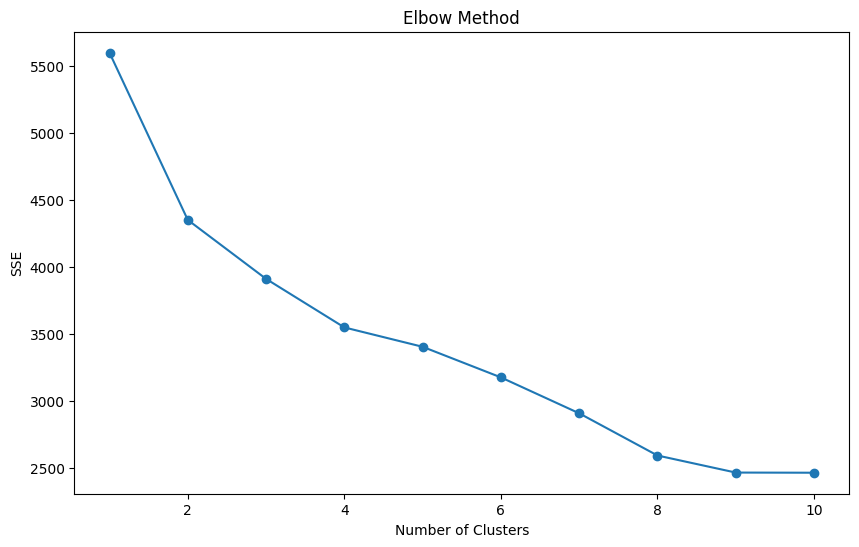

In [111]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_preprocessed)
    sse.append(kmeans.inertia_)

# Plotting the Elbow curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Assuming the elbow is at k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_preprocessed)


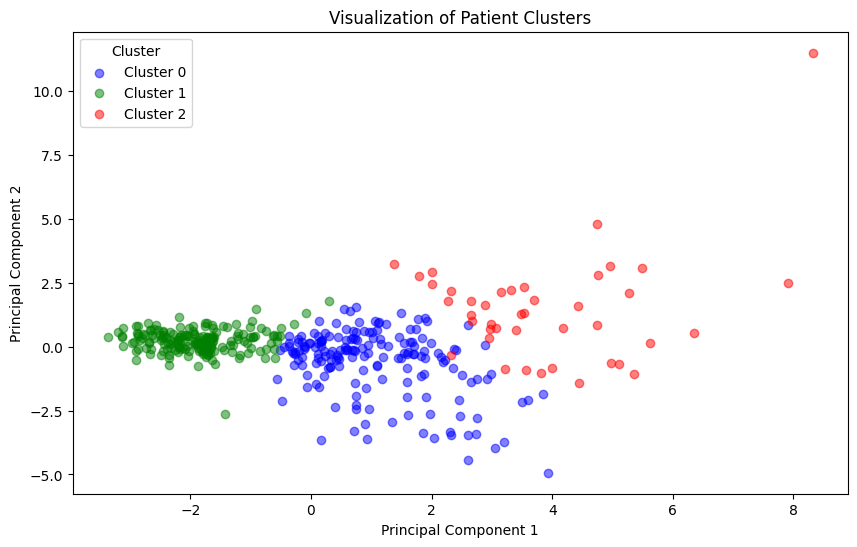

In [112]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

# Setting up the plot
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']  # Define a list of colors for the clusters

# Scatter plot
for i in range(np.max(clusters) + 1):  # Loop through the number of clusters
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], 
                color=colors[i], label=f'Cluster {i}', alpha=0.5)

plt.title('Visualization of Patient Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')  # Add a legend to identify clusters
plt.show()


Q8:

In [113]:
X_train, X_test = train_test_split(X, test_size=0.30, random_state=1)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (280, 24)
Testing set size: (120, 24)


Q9:
1,Logistic Regression
Logistic Regression provides clear interpretability, which is crucial in medical settings where understanding the influence of predictors is as important as the prediction itself. 
2,Random Forest
Random Forest can capture complex interactions between features without requiring feature engineering, making it powerful for medical datasets where interactions between symptoms and biological markers can be non-linear and complex.

Q10:
 Accuracy:it measures the proportion of true results (both true positives and true negatives) among the total number of cases which examined. It provides a indicator of a model's  effectiveness at  classifying different cases.
 Confusion Matrics:It helps in understanding exactly where the classifier is making errors, which is critical for medical applications. Knowing the numbers of false positives and false negatives can be crucial for improving diagnostic procedures and treatments.
 

Q11

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(exclude=['object', 'category']).columns

# Preprocessing for numerical data: imputation followed by scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data: imputation followed by one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

model = RandomForestClassifier(n_estimators=100, random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Train the Random Forest Classifier
pipeline.fit(X_train, y_train)

# Predict using the test set
y_pred = pipeline.predict(X_test)

print(y_pred)



d:\python\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['rbc' 'pc' 'pcc' 'ba' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
d:\python\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


['notckd' 'ckd' 'notckd' 'notckd' 'ckd' 'notckd' 'ckd' 'notckd' 'ckd'
 'notckd' 'ckd' 'notckd' 'ckd' 'notckd' 'notckd' 'ckd' 'notckd' 'ckd'
 'ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd'
 'notckd' 'ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'ckd'
 'notckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'notckd'
 'notckd' 'notckd' 'notckd' 'ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'notckd'
 'notckd' 'ckd' 'notckd' 'notckd' 'ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd'
 'ckd' 'notckd' 'notckd' 'notckd' 'ckd' 'ckd' 'notckd' 'notckd' 'ckd'
 'notckd' 'ckd' 'ckd' 'ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd'
 'notckd' 'ckd' 'notckd' 'ckd' 'ckd' 'notckd' 'notckd' 'notckd' 'ckd'
 'notckd' 'notckd' 'notckd' 'notckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd'
 'ckd' 'notckd' 'ckd' 'ckd' 'notckd' 'notckd' 'ckd' 'notckd' 'ckd' 'ckd'
 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'notckd']


d:\python\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['rbc' 'pc' 'pcc' 'ba' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [134]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(exclude=['object', 'category']).columns

# Preprocessing for numerical data: imputation followed by scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data: imputation followed by one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the models
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Create preprocessing and modelling pipelines
forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', forest_model)])
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', logreg_model)])

# Train the Random Forest Classifier
forest_pipeline.fit(X_train, y_train)
# Train the Logistic Regression
logreg_pipeline.fit(X_train, y_train)

# Predict using the test set with RandomForest
y_pred_forest = forest_pipeline.predict(X_test)
# Predict using the test set with Logistic Regression
y_pred_logreg = logreg_pipeline.predict(X_test)




d:\python\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['rbc' 'pc' 'pcc' 'ba' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
d:\python\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\python\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['rbc' 'pc' 'pcc' 'ba' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
d:\python\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

Q12

In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Accuracy for RandomForest
accuracy_forest = accuracy_score(y_test, y_pred_forest)
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)

# Accuracy for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Display the results
print("Random Forest Accuracy:", accuracy_forest)
print("Random Forest Confusion Matrix:\n", conf_matrix_forest)
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_logreg)


Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
 [[70  0]
 [ 0 50]]
Logistic Regression Accuracy: 0.975
Logistic Regression Confusion Matrix:
 [[67  3]
 [ 0 50]]


Q13

In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# Define which columns are categorical and numerical in your dataset
categorical_cols = X.select_dtypes(include=['object', 'bool', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data: imputation followed by scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data: imputation followed by one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Apply transformations to the data
X_preprocessed = preprocessor.fit_transform(X)


d:\python\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['rbc' 'pc' 'pcc' 'ba' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [117]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_full = LogisticRegression(random_state=1)

# Fit the model on the preprocessed data
logreg_full.fit(X_preprocessed, y)


d:\python\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=1)

In [118]:
# Get the coefficients from the trained model
feature_names = preprocessor.get_feature_names_out()  # Get the feature names after preprocessing
coefficients = logreg_full.coef_[0]

# Associate each coefficient with its corresponding feature name
importance = pd.Series(coefficients, index=feature_names)

# Sort features by their coefficient magnitude for interpretation
sorted_importance = importance.abs().sort_values(ascending=False)
print(sorted_importance)


num__hemo    0.987752
num__al      0.925141
num__sg      0.882522
num__sc      0.714171
num__bu      0.659715
num__su      0.625505
num__pcv     0.519588
num__bgr     0.333517
num__bp      0.270300
num__age     0.244780
num__sod     0.235290
num__pot     0.127910
num__wbcc    0.091388
num__rbcc    0.026597
dtype: float64


The features with the highest coefficients are generally those directly related to kidney function tests and blood tests, which are critical in diagnosing and managing CKD.
This model effectively highlights the key biomarkers for CKD, which could help in early detection and management strategies.

Q14

As for interaction terms or the polynomial features are concerned they can be employed to ensure the non-linear relationships between them are taken into account. Finally, after the application of learning mechanisms, apply accuracy and confusion matrices to evaluate the upgrade process. Compare these results to the previously used models for the targeted sub-groups to check whether the performance of the model parametrically upgraded or not.

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


categorical_cols = [col for col in X.columns if X[col].dtype == 'object']  
numerical_cols = [col for col in X.columns if X[col].dtype != 'object']  # Numerical columns

# Create transformers for preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Use median for numerical columns
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Use 'missing' for categorical columns
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the classifiers
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Create preprocessing and modeling pipelines
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', random_forest_classifier)])

pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', logistic_regression_classifier)])


# Fit both classifiers
pipeline_rf.fit(X_train, y_train)
pipeline_lr.fit(X_train, y_train)

# Predict using both classifiers
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluate both classifiers
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)

print(f"Logistic Regression Accuracy: {accuracy_lr}")
print("Logistic Regression Confusion Matrix:\n", conf_matrix_lr)


Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
 [[70  0]
 [ 0 50]]
Logistic Regression Accuracy: 0.975
Logistic Regression Confusion Matrix:
 [[67  3]
 [ 0 50]]


d:\python\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['rbc' 'pc' 'pcc' 'ba' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
d:\python\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\python\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['rbc' 'pc' 'pcc' 'ba' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
d:\python\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes [2] \\
     & OR answer [2]\\
3.   & Codes [3] and answer [3]\\
4.   & Codes [2] and answer [3]\\
5.   & Codes [2]\\
     & OR answer [2]\\
6.   & Codes [2] \\
     & OR answer [2]\\
7.   & Codes [3] and Plot [1]\\
8.   & Codes [1]\\
9.   & Answers [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes [2] \\
      & these codes can be included in (12)\\
12.   & Codes (two classifiers training,\\
     & model selection for each classifier, \\
     & classifiers comparisons) [5] and answer [2]\\
13.   & Codes [1] and answers [2]\\
14.   & Codes and comparison will \\
     & give \textbf{bonus 2 points for the final grade}.\\
\end{tabular}
\end{table}

**The maximum point for this assignment is 39. We will convert this to 100%.**

**All group members will receive the same grade if they contribute to the same.**
